In [1]:
#importing required packages
#modelues for EDA steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modules for data cleaning and data analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

#modules for model building
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler

#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

#modules for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve

#modules for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

#setting backend for matplotlib
%matplotlib inline

#setting formatting options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

#setting plot style
plt.style.use('seaborn-darkgrid')

In [2]:
#load the dataset
df = pd.read_excel("ivf.xlsx")

In [3]:
#print the top 5 record of the IVF 
df.head()

,Patient Age at Treatment,Date patient started trying to become pregnant OR date of last pregnancy,"Total Number of Previous cycles, Both IVF and DI","Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,Total Number of Previous DI cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF or DI,Total number of live births - conceived through IVF,Total number of live births - conceived through DI,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,Cause of Infertility - Tubal disease,Cause of Infertility - Ovulatory Disorder,Cause of Infertility - Male Factor,Cause of Infertility - Patient Unexplained,Cause of Infertility - Endometriosis,Cause of Infertility - Cervical factors,Cause of Infertility - Female Factors,Cause of Infertility - Partner Sperm Concentration,Cause of Infertility - Partner Sperm Morphology,Causes of Infertility - Partner Sperm Motility,Cause of Infertility - Partner Sperm Immunological factors,Main Reason for Producing Embroys Storing Eggs,Stimulation used,Type of Ovulation Induction,Egg Donor Age at Registration,Sperm Donor Age at Registration,Donated embryo,Patient acting as Surrogate,Type of treatment - IVF or DI,Specific treatment type,PGD,PGD treatment,PGS,PGS Treatment,Elective Single Embryo Transfer,Egg Source,Sperm From,Fresh Cycle,Frozen Cycle,Eggs Thawed,Fresh Eggs Collected,Fresh Eggs Stored,Total Eggs Mixed,Eggs Mixed With Partner Sperm,Eggs Mixed With Donor sperm,Total Embryos Created,Eggs Micro-injected,Embryos from Eggs Micro-injected,Total Embryos Thawed,Embryos Transfered,Embryos Transfered from Eggs Micro-injected,Embryos Stored For Use By Patient,Embryos (from Eggs Micro-injected) Stored For Use By Patient,Date of Egg Collection,Date of Egg Thawing,Date of Egg Mixing,Date of Embryo Thawing,Date of Embryo Transfer,Year of Treatment,Live Birth Occurrence,Number of Live Births,Early Outcome,Number of foetal sacs with fetal pulsation,Heart One Weeks Gestation,Heart One Birth Outcome,Heart One Birth Weight,Heart OneSex,Heart One Delivery Date,Heart One Birth Congenital Abnormalities,Heart Two Weeks Gestation,Heart Two Birth Outcome,Heart Two Birth Weight,Heart Two Sex,Heart Two Delivery Date,Heart Two Birth Congenital Abnormalities,Heart Three Weeks Gestation,Heart Three Birth Outcome,Heart Three Birth Weight,Heart Three Sex,Heart Three Delivery Date,Heart Three Birth Congenital Abnormalities,Heart Four Weeks Gestation,Heart Four Birth Outcome,Heart Four Birth Weight,Heart Four Sex,Heart Four Delivery Date,Heart Four Birth Congenital Abnormalities
0,40-42,NaN,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Treatment Now,0,NaN,NaN,NaN,0.000000,0.000000,IVF,IVF,0.000000,NaN,NaN,NaN,1.000000,Patient,Partner,0.000000,1.000000,0.000000,0,0.000000,0,0,0,0,0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,2016,1.000000,1,Intrauterine Fetal Pulsation Seen,1,39,Live Birth,Between 3.5kg and 3.99Kg,F,999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45-50,NaN,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Treatment Now,1,Yes but not recorded,NaN,NaN,0.000000,0.000000,IVF,ICSI,0.000000,NaN,NaN,NaN,0.000000,Patient,Partner,1.000000,0.000000,0.000000,4,0.000000,3,3,0,3,3,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,5.000000,2016,NaN,0,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-37,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,For Storing Eggs,1,Yes but not recorded,NaN,NaN,0.000000,0.000000,IVF,IVF,0.000000,NaN,NaN,NaN,0.000000,Patient,Partner,1.000000,0.000000,0.000000,12,6.00000

In [4]:
#check the shape of the dataset 
df.shape

(158519, 95)

In [5]:
#using value_counts() on the live birth occurence 
df['Live Birth Occurrence'].value_counts()

1.000000    38082
Name: Live Birth Occurrence, dtype: int64

In [6]:
# Fill missing values with 0 live birth 
df['Live Birth Occurrence'] = df['Live Birth Occurrence'].fillna(0)

In [7]:
df['Live Birth Occurrence'] = df['Live Birth Occurrence'].astype(int)

In [8]:
df['Live Birth Occurrence'].value_counts()

0    120437
1     38082
Name: Live Birth Occurrence, dtype: int64

In [9]:
#check the columns 
df.columns

Index(['Patient Age at Treatment',
       'Date patient started trying to become pregnant OR date of last pregnancy',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease'

In [10]:
#checking for missing values
df.isnull().sum()

Patient Age at Treatment                                                         0
Date patient started trying to become pregnant OR date of last pregnancy    157902
Total Number of Previous cycles, Both IVF and DI                                 0
Total Number of Previous treatments, Both IVF and DI at clinic                   0
Total Number of Previous IVF cycles                                              0
Total Number of Previous DI cycles                                               0
Total number of previous pregnancies, Both IVF and DI                            0
Total number of IVF pregnancies                                                  0
Total number of DI pregnancies                                                   0
Total number of live births - conceived through IVF or DI                        0
Total number of live births - conceived through IVF                              0
Total number of live births - conceived through DI                               0
Type

In [11]:
# Handle missing values
# Drop columns with a large number of missing values
threshold = len(df) * 0.5  # Set a threshold for missing values
df.dropna(thresh=threshold, axis=1, inplace=True)

In [12]:
# Impute missing values in numerical columns with mean
numerical_columns = df.select_dtypes(include='number').columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [13]:
# Impute missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [14]:
df.shape

(158519, 63)

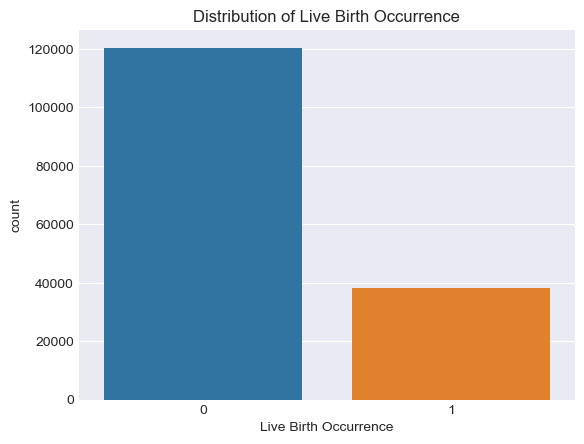

In [15]:
# Perform exploratory data analysis (EDA)
# Plot distribution of the target variable
sns.countplot(x='Live Birth Occurrence', data=df)
plt.title('Distribution of Live Birth Occurrence')
plt.show()

In [16]:
df.columns

Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility 

In [17]:
df['Patient Age at Treatment'].value_counts()

18 - 34    66316
35-37      35679
38-39      21817
40-42      21459
43-44       6912
45-50       3948
999         2388
Name: Patient Age at Treatment, dtype: int64

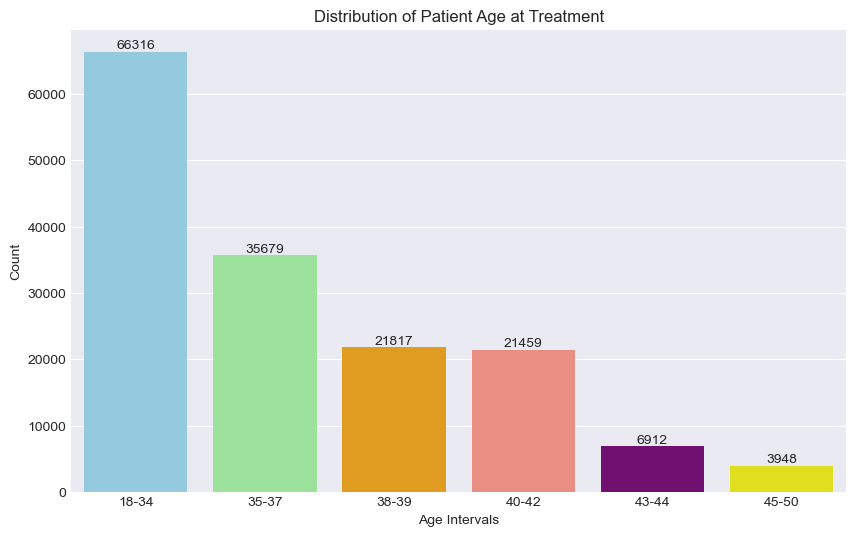

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age intervals and their respective counts
age_intervals = ['18-34', '35-37', '38-39', '40-42', '43-44', '45-50']
counts = [66316, 35679, 21817, 21459, 6912, 3948]

# Define a color palette
colors = ['skyblue', 'lightgreen', 'orange', 'salmon', 'purple', 'yellow']

# Plot the distribution using a bar plot with the specified color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=age_intervals, y=counts, palette=colors)
plt.xlabel('Age Intervals')
plt.ylabel('Count')
plt.title('Distribution of Patient Age at Treatment')

# Add the legend
for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.savefig('distribution_age_at_treatment_barplot.png')
plt.show()


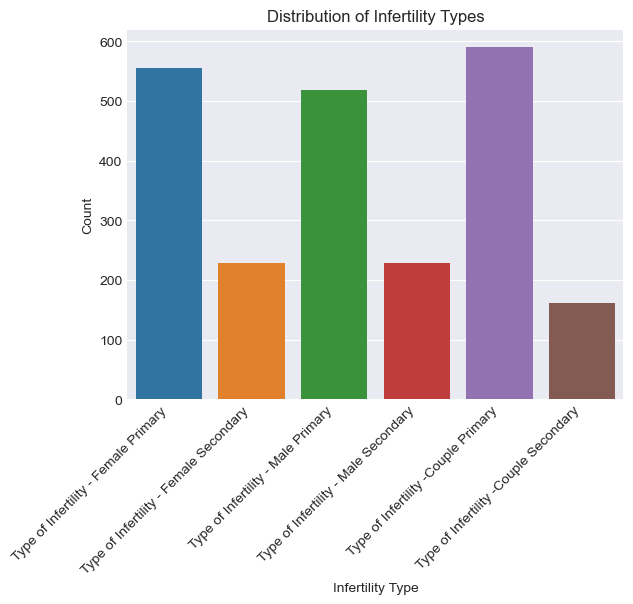

In [19]:
# Plotting a bar chart of infertility types
infertility_cols = ['Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary',
                    'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary',
                    'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary']
infertility_counts = df[infertility_cols].sum()
ax = sns.barplot(x=infertility_counts.index, y=infertility_counts.values)
plt.xlabel('Infertility Type')
plt.ylabel('Count')
plt.title('Distribution of Infertility Types')
plt.xticks(rotation=45)

# Placing x-axis labels under the bars
ax.set_xticklabels(infertility_counts.index, rotation=45, ha='right')

plt.show()

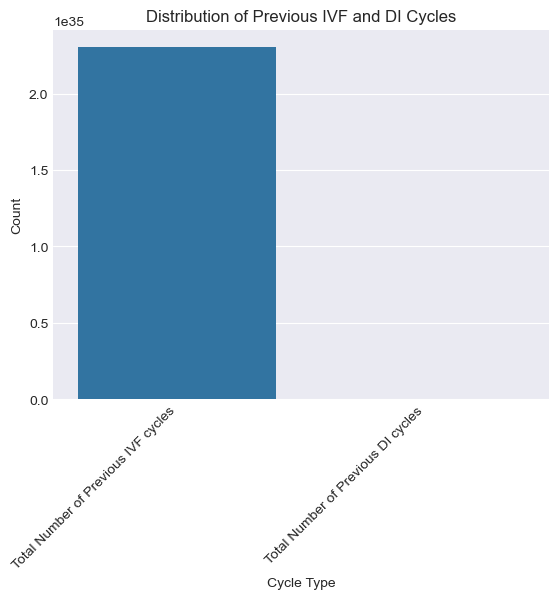

In [20]:
previous_cycles_cols = ['Total Number of Previous IVF cycles', 'Total Number of Previous DI cycles']
previous_cycles_counts = df[previous_cycles_cols].sum()
previous_cycles_counts = previous_cycles_counts.str.extract('(\d+)').astype(float)

# Plotting a stacked bar chart of previous IVF and DI cycles
ax = sns.barplot(x=previous_cycles_counts.index, y=previous_cycles_counts.values.flatten())
plt.xlabel('Cycle Type')
plt.ylabel('Count')
plt.title('Distribution of Previous IVF and DI Cycles')
plt.xticks(rotation=45)
ax.set_xticklabels(previous_cycles_counts.index, rotation=45, ha='right')

plt.show()

In [21]:
df.columns

Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility 

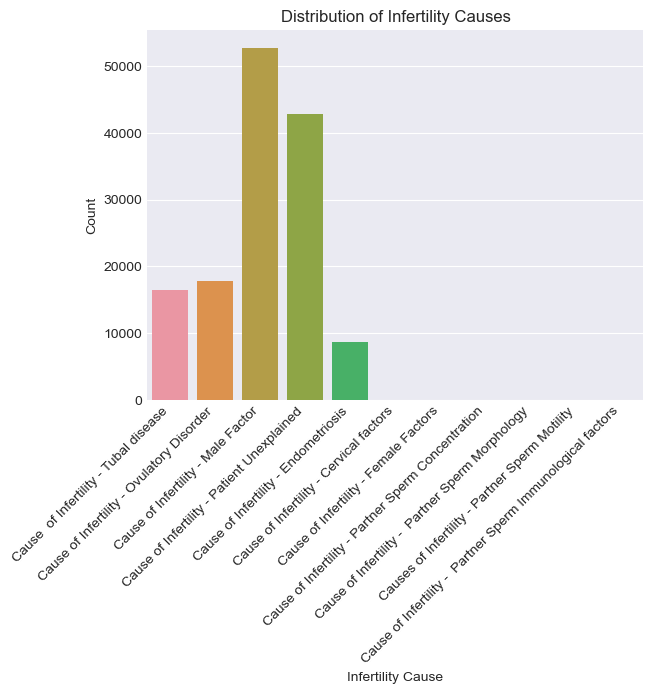

In [22]:
# Plotting a count plot of infertility causes
cause_cols = ['Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility - Female Factors',
       'Cause of Infertility - Partner Sperm Concentration',
       'Cause of Infertility -  Partner Sperm Morphology',
       'Causes of Infertility - Partner Sperm Motility',
       'Cause of Infertility -  Partner Sperm Immunological factors']
cause_counts = df[cause_cols].sum()
ax = sns.barplot(x=cause_counts.index, y=cause_counts.values)
plt.xlabel('Infertility Cause')
plt.ylabel('Count')
plt.title('Distribution of Infertility Causes')
plt.savefig('infertilitycauses.png')
plt.xticks(rotation=45)

# Placing x-axis labels under the bars
ax.set_xticklabels(cause_counts.index, rotation=45, ha='right')

plt.show()

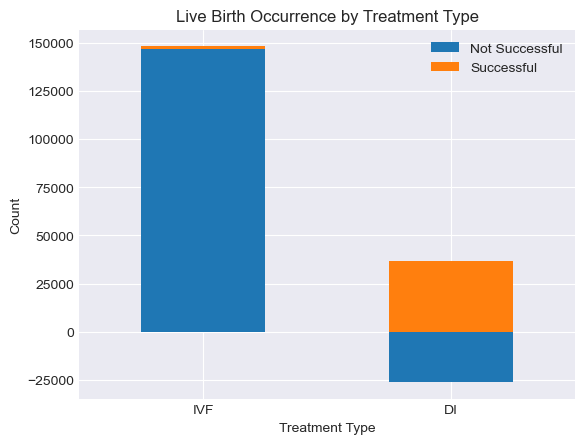

In [23]:
# Plotting a stacked bar plot of treatment type and live birth occurrence
treatment_type_counts = df['Type of treatment - IVF or DI'].value_counts()
treatment_occurrence_counts = df.groupby('Type of treatment - IVF or DI')['Live Birth Occurrence'].sum()
df_plot = pd.DataFrame({'Treatment Type': treatment_type_counts.index,
                        'Not Successful': treatment_type_counts.values - treatment_occurrence_counts.values,
                        'Successful': treatment_occurrence_counts.values})
df_plot.set_index('Treatment Type', inplace=True)
df_plot.plot(kind='bar', stacked=True)
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.title('Live Birth Occurrence by Treatment Type')
plt.xticks(rotation=0)
plt.legend()
plt.savefig('occurence with treatment.png')
plt.show()

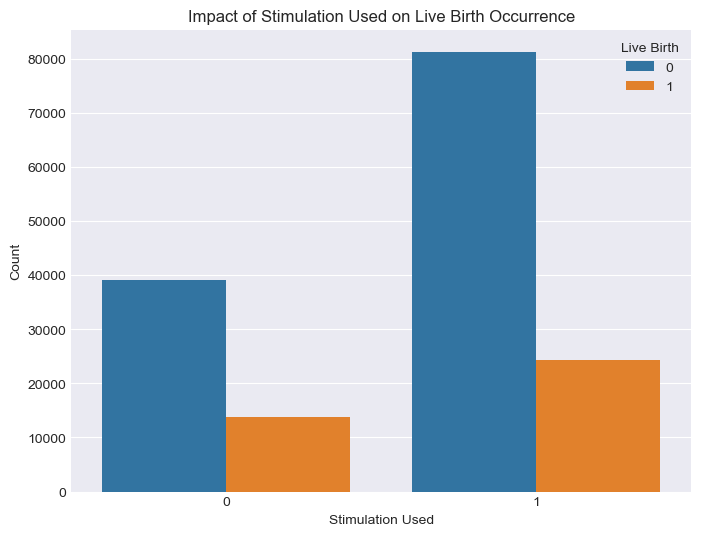

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Stimulation used', hue='Live Birth Occurrence')
plt.xlabel('Stimulation Used')
plt.ylabel('Count')
plt.title('Impact of Stimulation Used on Live Birth Occurrence')
plt.legend(title='Live Birth')
plt.savefig('simulated.png')
plt.show()

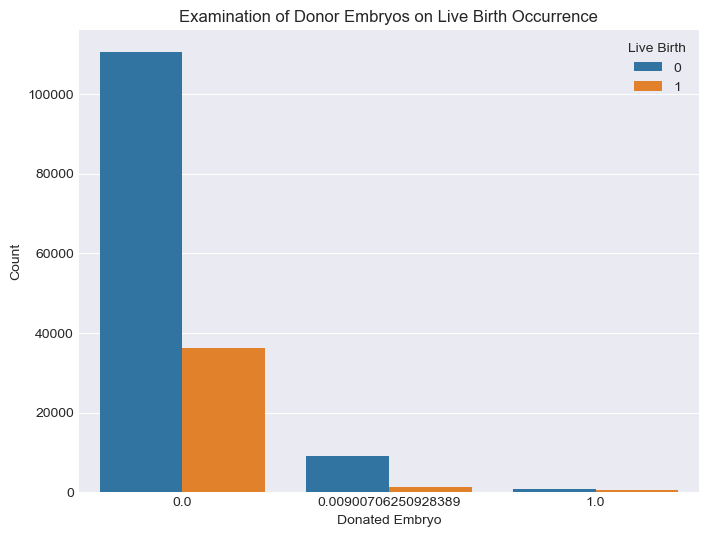

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Donated embryo', hue='Live Birth Occurrence')
plt.xlabel('Donated Embryo')
plt.ylabel('Count')
plt.title('Examination of Donor Embryos on Live Birth Occurrence')
plt.legend(title='Live Birth')
plt.show()

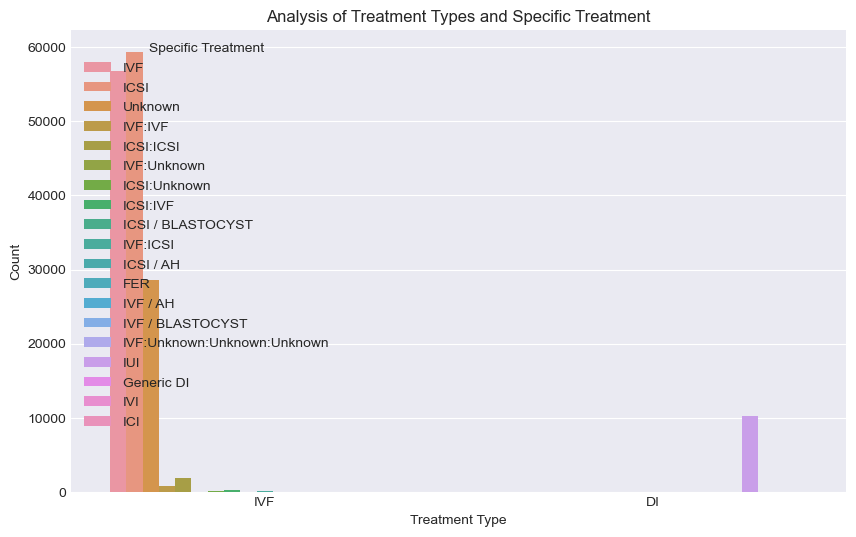

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type of treatment - IVF or DI', hue='Specific treatment type')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.title('Analysis of Treatment Types and Specific Treatment')
plt.legend(title='Specific Treatment')
plt.show()

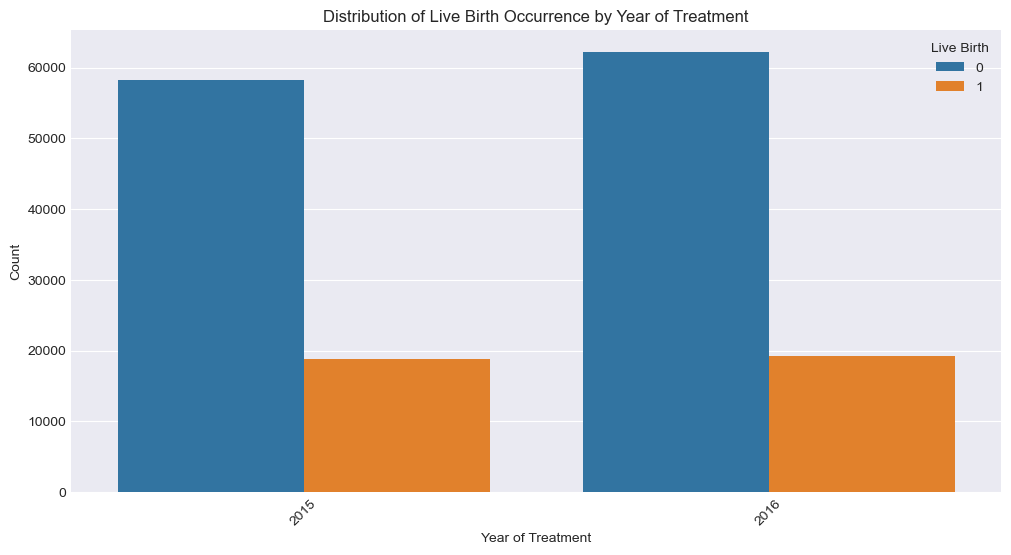

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year of Treatment', hue='Live Birth Occurrence')
plt.xlabel('Year of Treatment')
plt.ylabel('Count')
plt.title('Distribution of Live Birth Occurrence by Year of Treatment')
plt.legend(title='Live Birth')
plt.xticks(rotation=45)
plt.show()

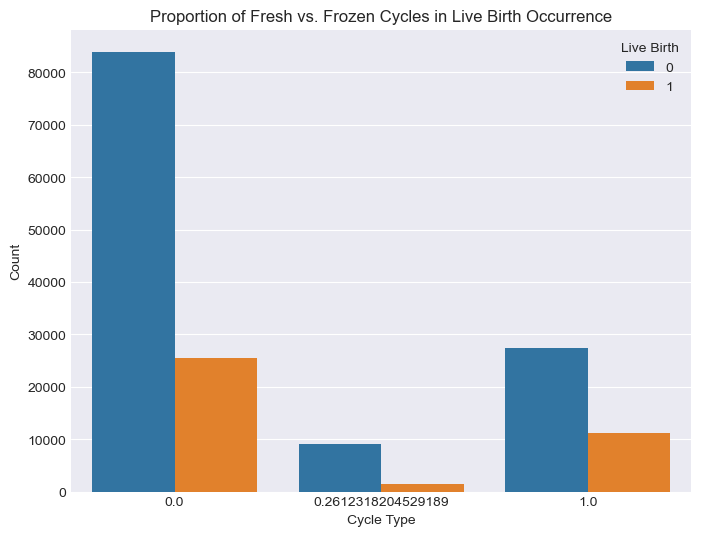

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Frozen Cycle', hue='Live Birth Occurrence')
plt.xlabel('Cycle Type')
plt.ylabel('Count')
plt.title('Proportion of Fresh vs. Frozen Cycles in Live Birth Occurrence')
plt.legend(title='Live Birth')
plt.show()

In [29]:
df['Elective Single Embryo Transfer'].value_counts()

0.000000    105515
1.000000     42591
0.287571     10413
Name: Elective Single Embryo Transfer, dtype: int64

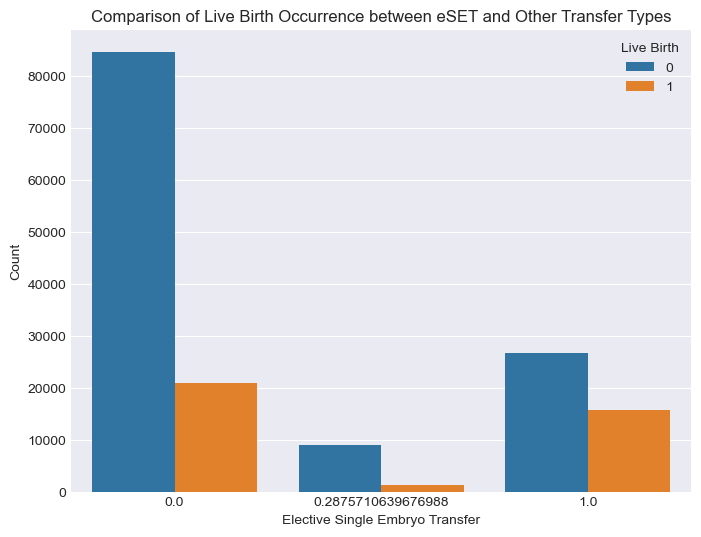

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Elective Single Embryo Transfer', hue='Live Birth Occurrence')
plt.xlabel('Elective Single Embryo Transfer')
plt.ylabel('Count')
plt.title('Comparison of Live Birth Occurrence between eSET and Other Transfer Types')
plt.legend(title='Live Birth')
plt.show()


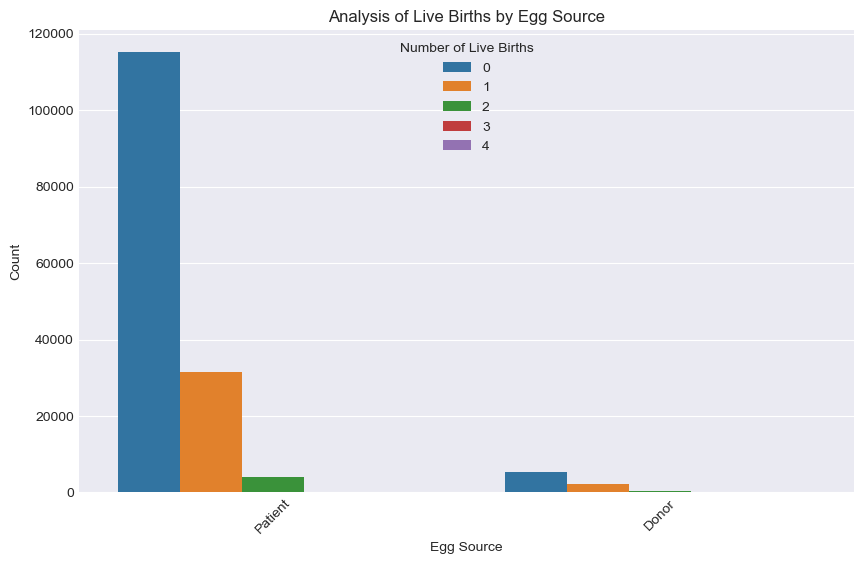

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Egg Source', hue='Number of Live Births')
plt.xlabel('Egg Source')
plt.ylabel('Count')
plt.title('Analysis of Live Births by Egg Source')
plt.legend(title='Number of Live Births')
plt.xticks(rotation=45)
plt.show()


In [32]:
df.head()

,Patient Age at Treatment,"Total Number of Previous cycles, Both IVF and DI","Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,Total Number of Previous DI cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF or DI,Total number of live births - conceived through IVF,Total number of live births - conceived through DI,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,Cause of Infertility - Tubal disease,Cause of Infertility - Ovulatory Disorder,Cause of Infertility - Male Factor,Cause of Infertility - Patient Unexplained,Cause of Infertility - Endometriosis,Cause of Infertility - Cervical factors,Cause of Infertility - Female Factors,Cause of Infertility - Partner Sperm Concentration,Cause of Infertility - Partner Sperm Morphology,Causes of Infertility - Partner Sperm Motility,Cause of Infertility - Partner Sperm Immunological factors,Main Reason for Producing Embroys Storing Eggs,Stimulation used,Type of Ovulation Induction,Donated embryo,Patient acting as Surrogate,Type of treatment - IVF or DI,Specific treatment type,PGD,Elective Single Embryo Transfer,Egg Source,Sperm From,Fresh Cycle,Frozen Cycle,Eggs Thawed,Fresh Eggs Collected,Fresh Eggs Stored,Total Eggs Mixed,Eggs Mixed With Partner Sperm,Eggs Mixed With Donor sperm,Total Embryos Created,Eggs Micro-injected,Embryos from Eggs Micro-injected,Total Embryos Thawed,Embryos Transfered,Embryos Transfered from Eggs Micro-injected,Embryos Stored For Use By Patient,Embryos (from Eggs Micro-injected) Stored For Use By Patient,Date of Egg Collection,Date of Egg Mixing,Date of Embryo Transfer,Year of Treatment,Live Birth Occurrence,Number of Live Births,Early Outcome,Number of foetal sacs with fetal pulsation
0,40-42,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Treatment Now,0,Yes but not recorded,0.000000,0.000000,IVF,IVF,0.000000,1.000000,Patient,Partner,0.000000,1.000000,0.000000,0,0.000000,0,0,0,0,0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.914986,0.000000,2016,1,1,Intrauterine Fetal Pulsation Seen,1
1,45-50,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Treatment Now,1,Yes but not recorded,0.000000,0.000000,IVF,ICSI,0.000000,0.000000,Patient,Partner,1.000000,0.000000,0.000000,4,0.000000,3,3,0,3,3,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2016,0,0,None,0
2,35-37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,For Storing Eggs,1,Yes but not recorded,0.000000,0.000000,IVF,IVF,0.000000,0.000000,Patient,Partner,1.000000,0.000000,0.000000,12,6.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.914986,5.639989,2016,0,0,None,0
3,18 - 34,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,Treatment Now,0,Yes but not recorded,0.000000,0.000000,IVF,Unknown,0.000000,1.000000,Patient,Partner,0.000000,1.000000,0.000000,0,0.000000,0,0,0,0,0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.914986,0.000000,2016,0,0,Biochemical Pregnancy Only,0
4,18 - 34,5,5,5,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,Treatment Now,1,Yes but not recorded,0.000000,0.000000,IVF,ICSI,0.000000,0.000000,Patient,Partner,1.000000,0.000000,0.000000,4,0.000000,4,4,0,4,4,4.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2016,0,0,None,0


In [33]:
df.columns

Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility 

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
# Define a list of features that are related to infertility causes
infertility_causes_features = [
    'Type of Infertility - Female Primary',
    'Type of Infertility - Female Secondary',
    'Type of Infertility - Male Primary',
    'Type of Infertility - Male Secondary',
    'Type of Infertility -Couple Primary',
    'Type of Infertility -Couple Secondary',
    'Cause  of Infertility - Tubal disease',
    'Cause of Infertility - Ovulatory Disorder',
    'Cause of Infertility - Male Factor',
    'Cause of Infertility - Patient Unexplained',
    'Cause of Infertility - Endometriosis',
    'Cause of Infertility - Cervical factors',
    'Cause of Infertility - Female Factors',
    'Cause of Infertility - Partner Sperm Concentration',
    'Cause of Infertility -  Partner Sperm Morphology',
    'Causes of Infertility - Partner Sperm Motility',
    'Cause of Infertility -  Partner Sperm Immunological factors',
     'Main Reason for Producing Embroys Storing Eggs',
    'Type of Ovulation Induction',
    'Donated embryo',
    'Patient acting as Surrogate',
    'Specific treatment type',
    'PGD', 'Patient Age at Treatment'
]


In [36]:
# Splitting the data into features (X) and target (y)
X = df[infertility_causes_features]
y = df['Live Birth Occurrence']

In [37]:
# Perform label encoding for categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [38]:
# Perform normalization on numerical variables
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [39]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
# Perform SMOTE to handle class imbalance
smote = RandomUnderSampler()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [41]:
# Convert the resampled target array to a DataFrame
y_resampled_df = pd.DataFrame(y_resampled, columns=['Live Birth Occurrence'])

# Check the value distribution
value_counts = y_resampled_df['Live Birth Occurrence'].value_counts()
print(value_counts)

0    38082
1    38082
Name: Live Birth Occurrence, dtype: int64


In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Train Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# List of columns representing different feature categories
feature_columns = ['Patient Age at Treatment', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 
                   'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary', 
                   'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary',
                   'Cause  of Infertility - Tubal disease', 'Cause of Infertility - Ovulatory Disorder', 
                   'Cause of Infertility - Male Factor', 'Cause of Infertility - Patient Unexplained', 
                   'Cause of Infertility - Endometriosis', 'Cause of Infertility - Cervical factors', 
                   'Cause of Infertility - Female Factors', 'Cause of Infertility - Partner Sperm Concentration', 
                   'Cause of Infertility -  Partner Sperm Morphology', 'Causes of Infertility - Partner Sperm Motility', 
                   'Cause of Infertility -  Partner Sperm Immunological factors', 'Main Reason for Producing Embroys Storing Eggs', 
                   'Type of Ovulation Induction', 'Donated embryo', 'Patient acting as Surrogate', 
                   'Specific treatment type', 'PGD']

# Dictionary to store metrics for each feature category
feature_metrics = {}

# Loop through each feature column
for column in feature_columns:
    # Subset data based on the feature category
    subset_metrics = {}
    for category in X_test[column].unique():
        subset_indices = X_test[column] == category
        subset_X = X_test[subset_indices]
        subset_y = y_test[subset_indices]

        # Skip calculation if there's only one class in the subset
        if len(np.unique(subset_y)) == 1:
            continue

        # Calculate metrics
        y_pred = model.predict(subset_X)
        tp = confusion_matrix(subset_y, y_pred)[1, 1]
        fp = confusion_matrix(subset_y, y_pred)[0, 1]
        precision = precision_score(subset_y, y_pred)
        recall = recall_score(subset_y, y_pred)

        subset_metrics[category] = {'TP': tp, 'FP': fp, 'Precision': precision, 'Recall': recall}

    feature_metrics[column] = subset_metrics

# Now feature_metrics dictionary contains metrics for each feature category
# You can analyze and visualize the results as needed


In [ ]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Fit the Random Forest model
rf_model.fit(X_resampled, y_resampled)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to associate features with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Select the top 10 most important features
top_features = feature_importance_df.head(5)['Feature'].tolist()

# Filter the data to keep only the top features
X_top_features = X_resampled[top_features]

# Initialize the Random Forest model with the top features
rf_model_top = RandomForestClassifier(random_state=42)

# Perform cross-validation on the model with top features
rf_scores_top = cross_val_score(rf_model_top, X_top_features, y_resampled, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Random Forest CV Scores (Top Features):", rf_scores_top)

Random Forest CV Scores (Top Features): [0.64353706 0.64563776 0.63690672 0.64498129 0.56945903]


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(random_state=42)

# List of models and their names
models = [rf_model, dt_model, svm_model]
model_names = ['Random Forest', 'Decision Tree', 'SVM']

# Loop through the models
for model, name in zip(models, model_names):
    # Perform k-fold cross-validation and predict on the whole dataset
    y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=5)
    
    # Generate classification report
    report = classification_report(y_resampled, y_pred)
    
    print(f"Classification Report for {name}:\n{report}\n")


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.49      0.56     38082
           1       0.60      0.76      0.67     38082

    accuracy                           0.62     76164
   macro avg       0.64      0.62      0.62     76164
weighted avg       0.64      0.62      0.62     76164


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.67      0.49      0.56     38082
           1       0.60      0.76      0.67     38082

    accuracy                           0.62     76164
   macro avg       0.63      0.62      0.62     76164
weighted avg       0.63      0.62      0.62     76164


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.67      0.43      0.53     38082
           1       0.58      0.79      0.67     38082

    accuracy                           0.61     76164
   macro avg 

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.49      0.57     30431
           1       0.60      0.75      0.67     30500

    accuracy                           0.62     60931
   macro avg       0.63      0.62      0.62     60931
weighted avg       0.63      0.62      0.62     60931




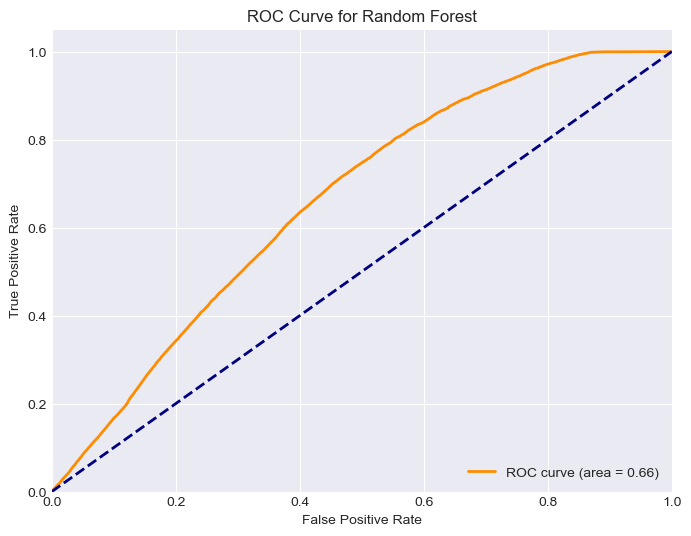

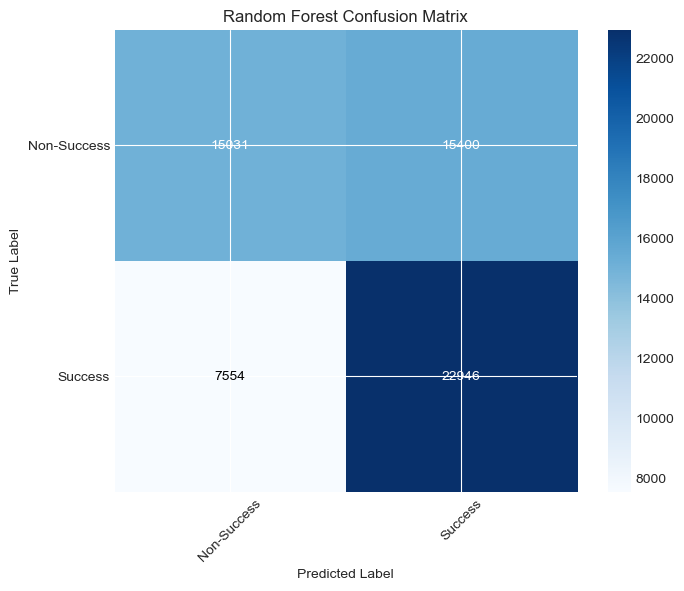

---------------------------------------------------
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.66      0.50      0.57     30431
           1       0.60      0.75      0.67     30500

    accuracy                           0.62     60931
   macro avg       0.63      0.62      0.62     60931
weighted avg       0.63      0.62      0.62     60931




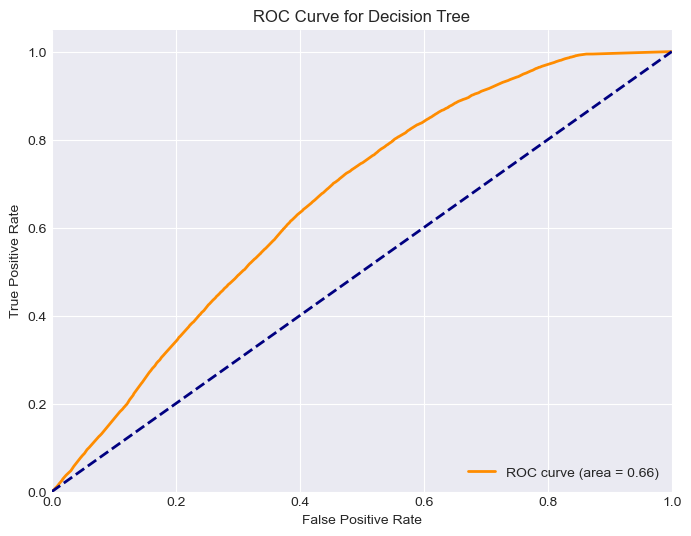

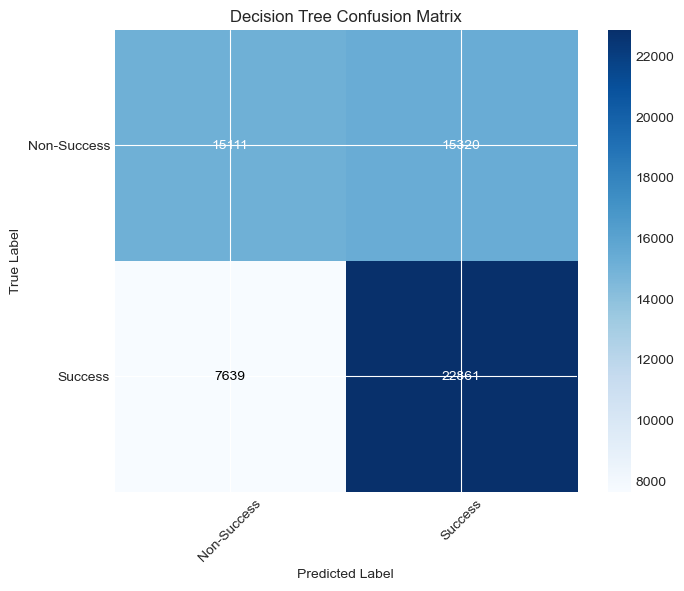

---------------------------------------------------
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.69      0.42      0.52     30431
           1       0.58      0.81      0.68     30500

    accuracy                           0.62     60931
   macro avg       0.64      0.62      0.60     60931
weighted avg       0.64      0.62      0.60     60931




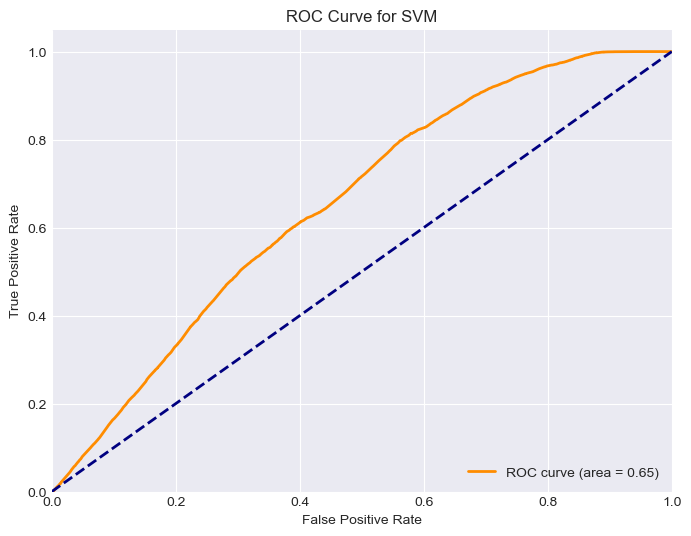

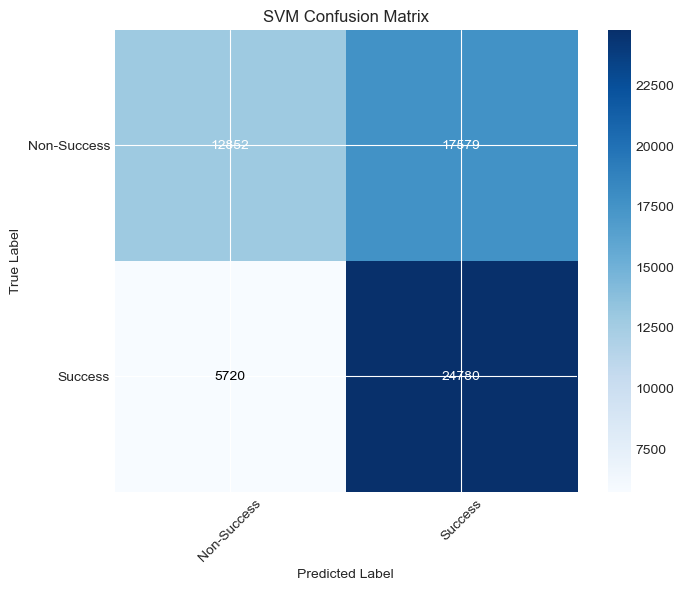

---------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split( X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Enable probability estimates for ROC curve

# List of models and their names
models = [rf_model, dt_model, svm_model]
model_names = ['Random Forest', 'Decision Tree', 'SVM']

for model, name in zip(models, model_names):
    # Perform k-fold cross-validation and predict on the whole dataset
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)
    
    # Generate classification report
    report = classification_report(y_train, y_pred)
    print(f"Classification Report for {name}:\n{report}\n")
    
    # Plot ROC Curve and calculate AUC if model supports probability estimates
    if hasattr(model, 'predict_proba'):
        y_scores = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
        fpr, tpr, thresholds = roc_curve(y_train, y_scores)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()
    
    # Confusion Matrix
    cm = confusion_matrix(y_train, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.colorbar()
    class_names = ["Non-Success", "Success"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("---------------------------------------------------")


Classification Report for Random Forest (Train):
              precision    recall  f1-score   support

           0       0.68      0.51      0.58     30431
           1       0.61      0.77      0.68     30500

    accuracy                           0.64     60931
   macro avg       0.65      0.64      0.63     60931
weighted avg       0.65      0.64      0.63     60931


Classification Report for Random Forest (Validation):
              precision    recall  f1-score   support

           0       0.67      0.50      0.57      7651
           1       0.60      0.75      0.67      7582

    accuracy                           0.63     15233
   macro avg       0.63      0.63      0.62     15233
weighted avg       0.64      0.63      0.62     15233




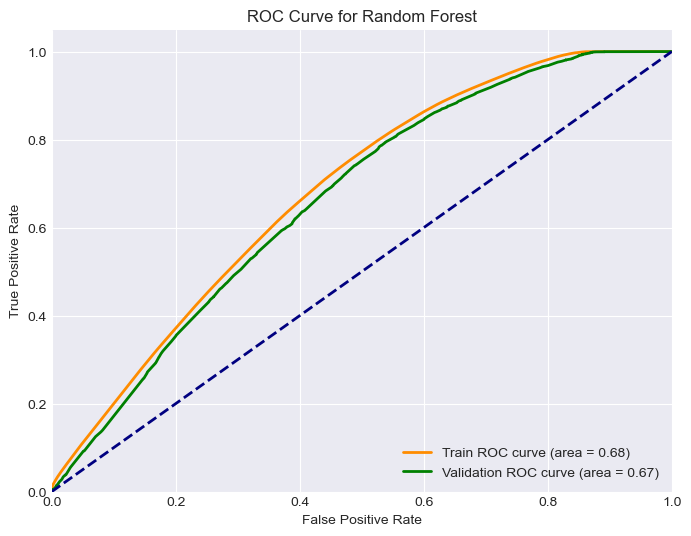

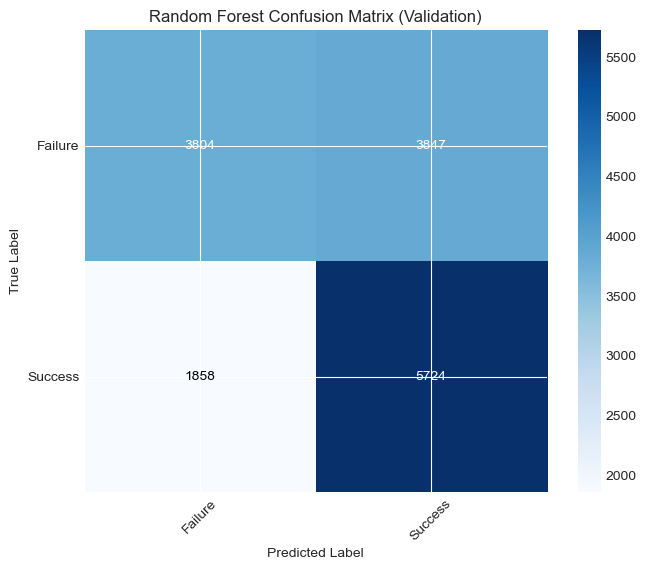

Classification Report for Decision Tree (Train):
              precision    recall  f1-score   support

           0       0.68      0.51      0.58     30431
           1       0.61      0.76      0.68     30500

    accuracy                           0.64     60931
   macro avg       0.65      0.64      0.63     60931
weighted avg       0.65      0.64      0.63     60931


Classification Report for Decision Tree (Validation):
              precision    recall  f1-score   support

           0       0.67      0.50      0.57      7651
           1       0.60      0.75      0.67      7582

    accuracy                           0.63     15233
   macro avg       0.64      0.63      0.62     15233
weighted avg       0.64      0.63      0.62     15233




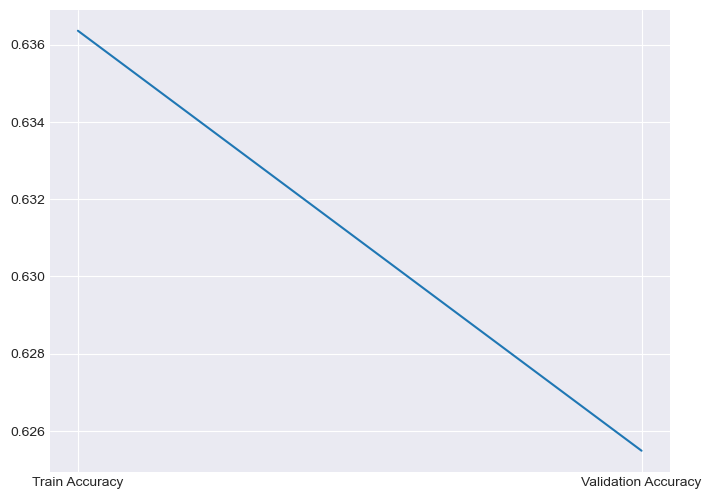

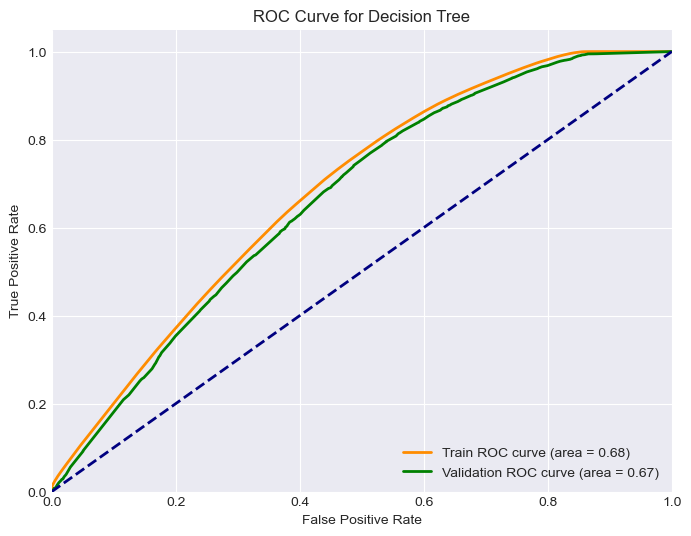

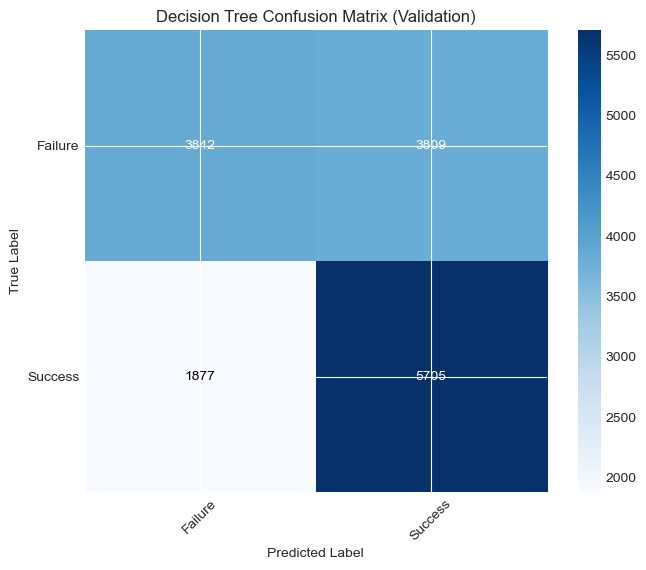

Classification Report for SVM (Train):
              precision    recall  f1-score   support

           0       0.69      0.42      0.53     30431
           1       0.59      0.81      0.68     30500

    accuracy                           0.62     60931
   macro avg       0.64      0.62      0.60     60931
weighted avg       0.64      0.62      0.60     60931


Classification Report for SVM (Validation):
              precision    recall  f1-score   support

           0       0.69      0.43      0.53      7651
           1       0.58      0.81      0.68      7582

    accuracy                           0.62     15233
   macro avg       0.64      0.62      0.60     15233
weighted avg       0.64      0.62      0.60     15233




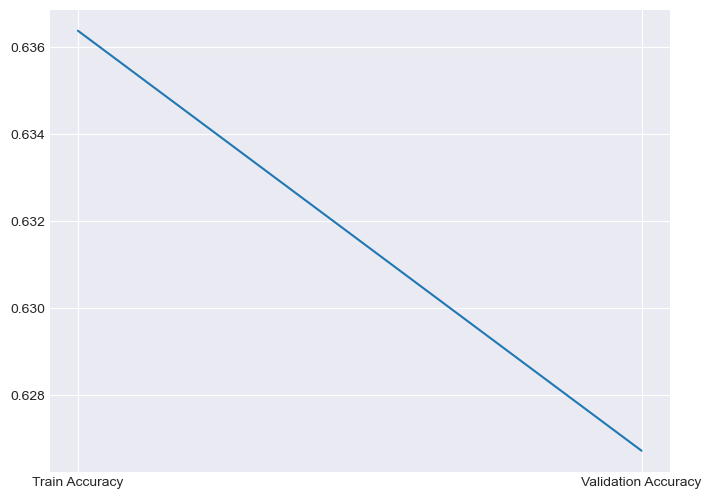

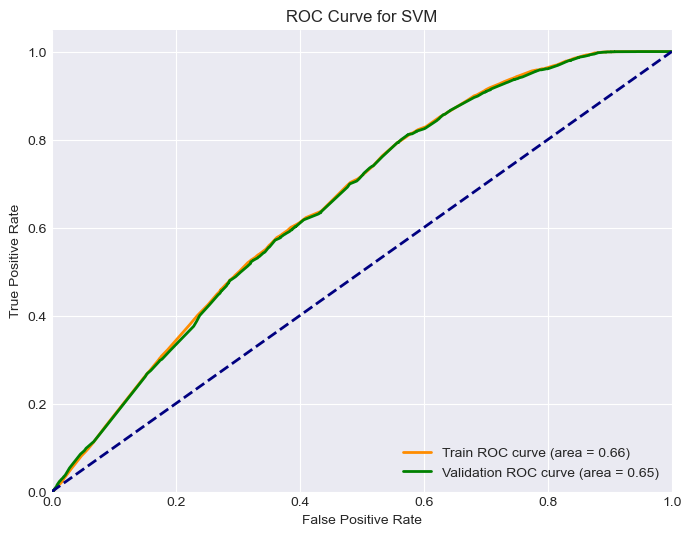

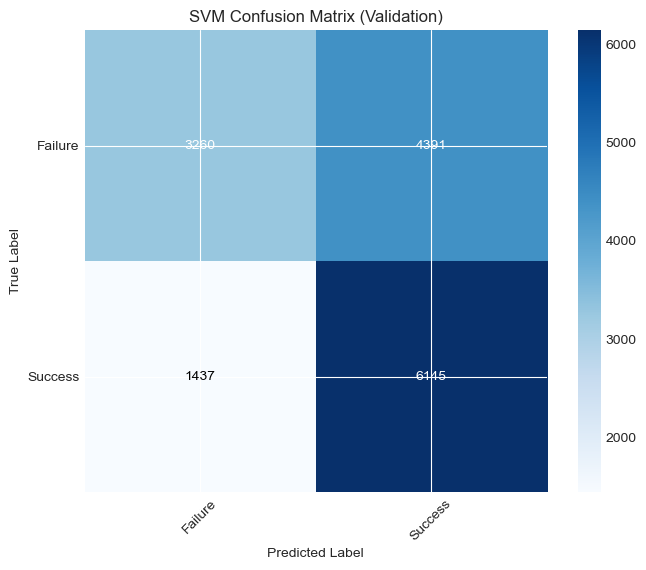

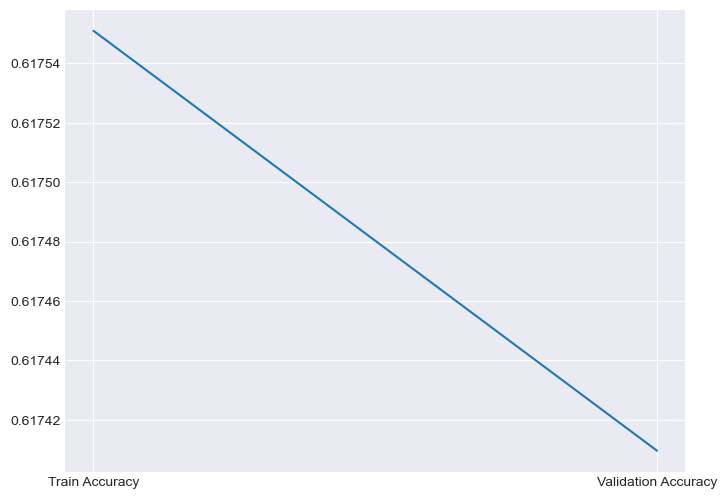

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming you have loaded X_resampled and y_resampled

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Enable probability estimates for ROC curve

# List of models and their names
models = [rf_model, dt_model, svm_model]
model_names = ['Random Forest', 'Decision Tree', 'SVM']

for model, name in zip(models, model_names):
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predictions on both train and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Generate classification report for train and validation
    train_report = classification_report(y_train, y_train_pred)
    val_report = classification_report(y_val, y_val_pred)
    
    print(f"Classification Report for {name} (Train):\n{train_report}\n")
    print(f"Classification Report for {name} (Validation):\n{val_report}\n")
    
    # Plot ROC Curve and calculate AUC if model supports probability estimates
    if hasattr(model, 'predict_proba'):
        y_train_scores = model.predict_proba(X_train)[:, 1]
        y_val_scores = model.predict_proba(X_val)[:, 1]
        
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_scores)
        roc_auc_train = auc(fpr_train, tpr_train)
        
        fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_scores)
        roc_auc_val = auc(fpr_val, tpr_val)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
        plt.plot(fpr_val, tpr_val, color='green', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix (Validation)")
    plt.colorbar()
    class_names = ["Failure", "Success"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Train and Validation Accuracy Plot
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(['Train Accuracy', 'Validation Accuracy'], [train_accuracy, val_accuracy])
